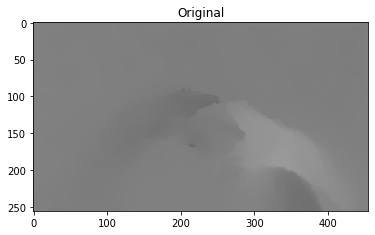

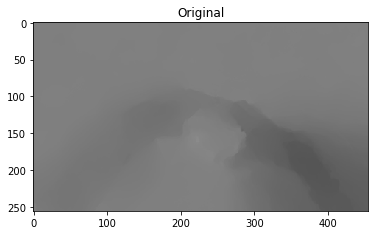

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage# Scaling the image pixels values within 0-1
img = imread('./GTEA61/flow_y_processed/S1/fold_bread/1/flow_y_00038.png') / 255
img2 = imread('./GTEA61/flow_x_processed/S1/fold_bread/1/flow_x_00038.png') / 255
plt.imshow(img)
plt.title('Original')
plt.show()
plt.imshow(img2)
plt.title('Original')
plt.show()

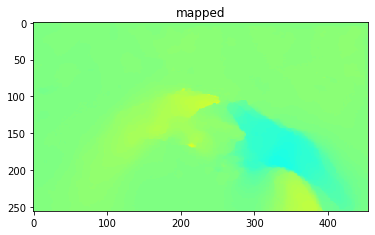

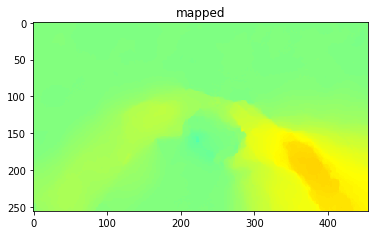

<class 'numpy.ndarray'>


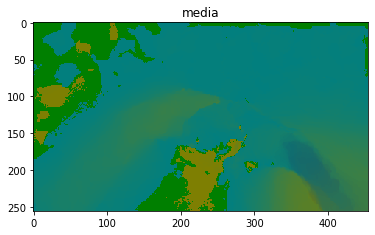

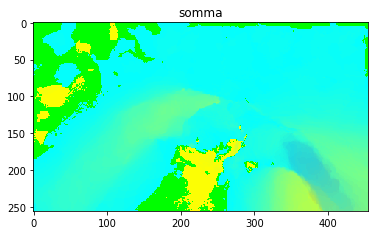

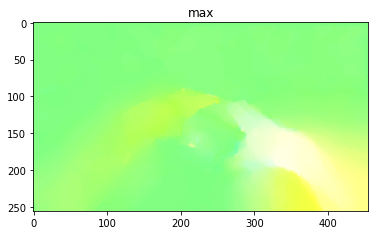

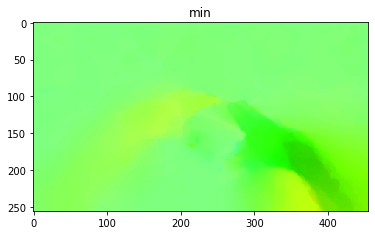

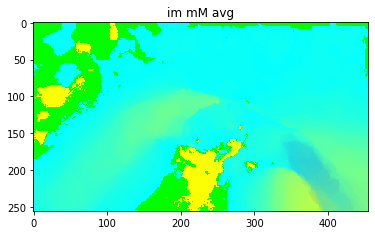

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

im_gray = cv2.imread('./GTEA61/flow_y_processed/S1/fold_bread/1/flow_y_00038.png', cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
plt.imshow(im_color)
plt.title('mapped')
plt.show()

im_gray2 = cv2.imread('./GTEA61/flow_x_processed/S1/fold_bread/1/flow_x_00038.png', cv2.IMREAD_GRAYSCALE)
im_color2 = cv2.applyColorMap(im_gray2, cv2.COLORMAP_JET)
plt.imshow(im_color2)
plt.title('mapped')
plt.show()

print(type(im_color))
im_media = np.array((im_color2 + im_color)/2,dtype = int)
plt.imshow(im_media)
plt.title('media')
plt.show()


im_sum = (im_color2 + im_color)
plt.imshow(im_sum)
plt.title('somma')
plt.show()

im_max = np.maximum(im_color,im_color2)
plt.imshow(im_max)
plt.title('max')
plt.show()

im_min = np.minimum(im_color,im_color2)
plt.imshow(im_min)
plt.title('min')
plt.show()

im_mM_sum = np.array((im_min + im_max),dtype = int)

plt.imshow(im_mM_sum)
plt.title('im mM avg')
plt.show()

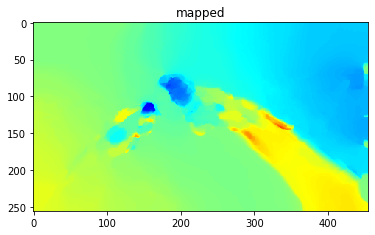

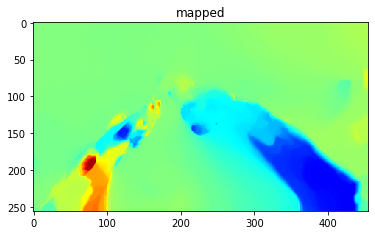

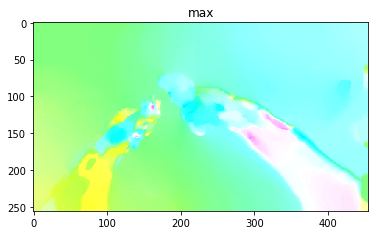

True

In [17]:
im_gray = cv2.imread('./GTEA61/flow_y_processed/S1/open_honey/1/flow_y_00025.png', cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
plt.imshow(im_color)
plt.title('mapped')
plt.show()

im_gray2 = cv2.imread('./GTEA61/flow_x_processed/S1/open_honey/1/flow_x_00025.png', cv2.IMREAD_GRAYSCALE)
im_color2 = cv2.applyColorMap(im_gray2, cv2.COLORMAP_JET)
plt.imshow(im_color2)
plt.title('mapped')
plt.show()

im_max = np.maximum(im_color,im_color2)
plt.imshow(im_max)
plt.title('max')
plt.show()

cv2.imwrite('open_honey.png', im_max)

In [3]:
from torch.nn.functional import conv2d
import torch
from PIL import Image
from torchvision.transforms import ToTensor
import math
from torch import nn

img_path="./GTEA61/flow_y_processed/S4/take_water/3/flow_y_00023.png"
channels = 1
image = Image.open(img_path)
image = ToTensor()(image).unsqueeze(0) # unsqueeze to add artificial first dimension
# Set these to whatever you want for your gaussian filter
kernel_size = 7
sigma = 3

# Create a x, y coordinate grid of shape (kernel_size, kernel_size, 2)
x_cord = torch.arange(kernel_size)
x_grid = x_cord.repeat(kernel_size).view(kernel_size, kernel_size)
y_grid = x_grid.t()
xy_grid = torch.stack([x_grid, y_grid], dim=-1)

mean = (kernel_size - 1)/2.
variance = sigma**2.

# Calculate the 2-dimensional gaussian kernel which is
# the product of two gaussian distributions for two different
# variables (in this case called x and y)
gaussian_kernel = (1./(2.*math.pi*variance)) *\
                  torch.exp(
                      -torch.sum((xy_grid - mean)**2., dim=-1) /\
                      (2*variance)
                  )
# Make sure sum of values in gaussian kernel equals 1.
gaussian_kernel = gaussian_kernel / torch.sum(gaussian_kernel)

# Reshape to 2d depthwise convolutional weight
gaussian_kernel = gaussian_kernel.view(1, 1, kernel_size, kernel_size)
gaussian_kernel = gaussian_kernel.repeat(channels, 1, 1, 1)

gaussian_filter = nn.Conv2d(in_channels=channels, out_channels=channels,
                            kernel_size=kernel_size, groups=channels, bias=False)

gaussian_filter.weight.data = gaussian_kernel
gaussian_filter.weight.requires_grad = False

#conv2d()

In [ ]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=100, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Clustered Image')
plt.show()

In [5]:
img_path="/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/S4/take_water/3/rgb/rgb0023.png"
image = Image.open(img_path)
#image = ToTensor()(image).unsqueeze(0) 

In [6]:
image.size

(455, 256)

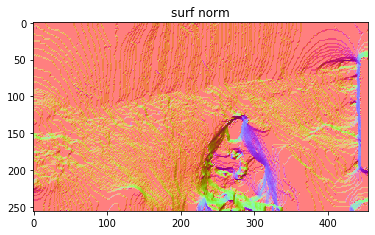

In [7]:
d_im = cv2.imread('./GTEA61/flow_y_processed/S4/take_water/3/flow_y_00023.png', cv2.IMREAD_GRAYSCALE)
d_im = d_im.astype("float32")
def create_normal(d_im,title):
    zy, zx = np.gradient(d_im)  
    # You may also consider using Sobel to get a joint Gaussian smoothing and differentation
    # to reduce noise
    #zx = cv2.Sobel(d_im, cv2.CV_64F, 1, 0, ksize=5)     
    #zy = cv2.Sobel(d_im, cv2.CV_64F, 0, 1, ksize=5)

    normal = np.dstack((-zx, -zy, np.ones_like(d_im)))
    n = np.linalg.norm(normal, axis=2)
    normal[:, :, 0] /= n
    normal[:, :, 1] /= n
    normal[:, :, 2] /= n

    # offset and rescale values to be in 0-255
    normal += 1
    normal /= 2
    #normal *= 255

    normal = normal[:, :, ::-1]
    plt.imshow(normal)
    plt.title(title)
    plt.show()
    return normal
surf_norm = create_normal(d_im,title="surf norm")

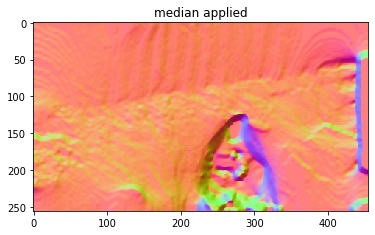

In [8]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(d_im,-1,kernel)

#median filter applied

med = create_normal(dst,"median applied")

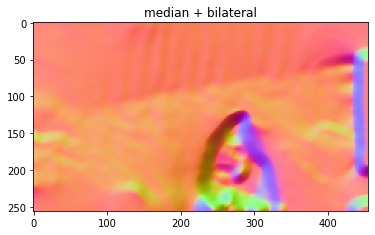

In [9]:
bil = cv2.bilateralFilter(dst,15,75,75)
medbil = create_normal(bil,"median + bilateral")

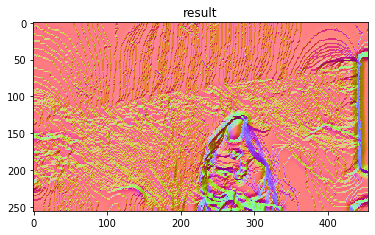

In [10]:
unsharp_image = cv2.addWeighted(d_im, 2, bil, -1, 0)
sfpp = create_normal(unsharp_image,'result')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


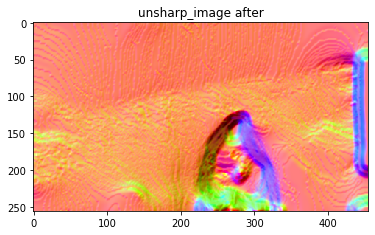

In [11]:
gauss = cv2.GaussianBlur(surf_norm, (3,3), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(medbil, 2, gauss, -1, 0)
plt.imshow(unsharp_image)
plt.title('unsharp_image after')
plt.show()

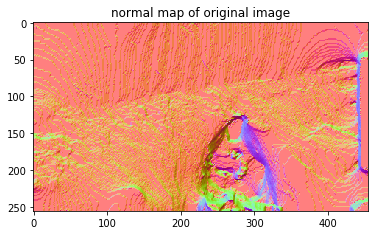

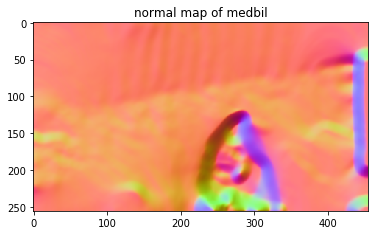

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


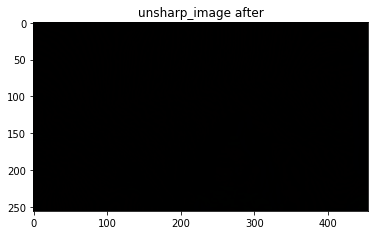

In [12]:

d_im = cv2.imread('./GTEA61/flow_y_processed/S4/take_water/3/flow_y_00023.png', cv2.IMREAD_GRAYSCALE)
d_im = d_im.astype("float32")
d_im_normal = create_normal(d_im, title = "normal map of original image")
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(d_im,-1,kernel)
bil = cv2.bilateralFilter(dst,15,75,75)
normal_medbil = create_normal(bil,title = "normal map of medbil")
gauss = cv2.GaussianBlur(normal_medbil, (3,3), 0)
# Apply Unsharp masking
unsharp_image_y = cv2.addWeighted(normal_medbil, 2, d_im_normal, -1, 0)
plt.imshow(unsharp_image/255)
plt.title('unsharp_image after')
plt.show()

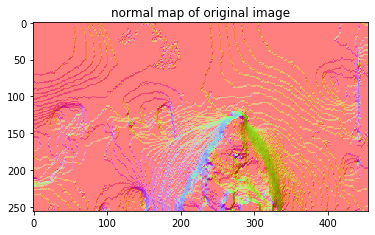

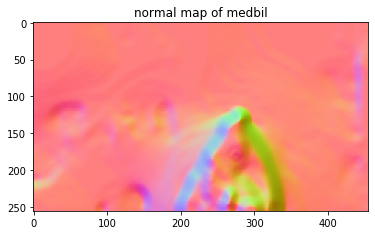

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


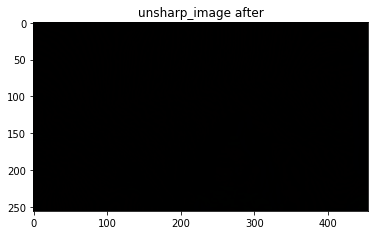

In [13]:
d_im = cv2.imread('./GTEA61/flow_x_processed/S4/take_water/3/flow_x_00023.png', cv2.IMREAD_GRAYSCALE)
d_im = d_im.astype("float32")
d_im_normal = create_normal(d_im, title = "normal map of original image")
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(d_im,-1,kernel)
bil = cv2.bilateralFilter(dst,15,75,75)
normal_medbil = create_normal(bil,title = "normal map of medbil")
gauss = cv2.GaussianBlur(normal_medbil, (3,3), 0)
# Apply Unsharp masking
unsharp_image_x = cv2.addWeighted(normal_medbil, 2, d_im_normal, -1, 0)
plt.imshow(unsharp_image/255)
plt.title('unsharp_image after')
plt.show()

In [14]:
max_img = np.maximum(unsharp_image_x,unsharp_image_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


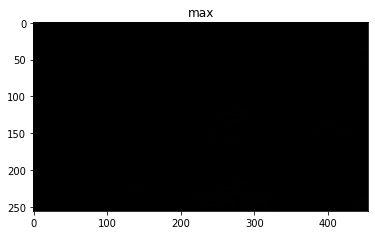

In [15]:
plt.imshow(np.array((max_img)/255,dtype = float))
plt.title('max')
plt.show()

In [16]:
(max_img/255 < 0).any()

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


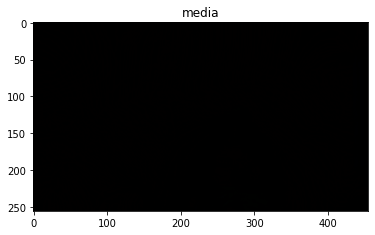

In [17]:
im_media = np.array((unsharp_image_x + unsharp_image_y)/510,dtype = float)
plt.imshow(im_media)
plt.title('media')
plt.show()

In [83]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def create_normal(d_im,title):
    zy, zx = np.gradient(d_im)  
    # You may also consider using Sobel to get a joint Gaussian smoothing and differentation
    # to reduce noise
    #zx = cv2.Sobel(d_im, cv2.CV_64F, 1, 0, ksize=5)     
    #zy = cv2.Sobel(d_im, cv2.CV_64F, 0, 1, ksize=5)

    normal = np.dstack((-zx, -zy, np.ones_like(d_im)))
    n = np.linalg.norm(normal, axis=2)
    normal[:, :, 0] /= n
    normal[:, :, 1] /= n
    normal[:, :, 2] /= n

    # offset and rescale values to be in 0-255
    normal += 1
    normal /= 2
    #normal *= 255
    normal[normal<0] = 0
    normal[normal>1] = 1
    #normal[normal>255] = 255
    #normal = np.array(normal,dtype=int)
    normal = normal[:, :, ::-1]
    #plt.imshow(normal/255)
    #plt.title(title)
    #plt.show()
    
    return normal

def surfaceNormal(path_to_image):
    
    d_im = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
    d_im = d_im.astype("float32")
    d_im_normal = create_normal(d_im, title = "normal map of original image")
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(d_im,-1,kernel)
    normal_medbil = create_normal(dst,title = "normal map of medbil")
    bil = cv2.bilateralFilter(normal_medbil,25,25,25)
    # Apply Unsharp masking
    unsharp_image_x = cv2.addWeighted(bil, 2, normal_medbil, -1, 0)
    #plt.imshow(unsharp_image_x)
    #plt.title('unsharp_image x')
    #plt.show()
    
    path_to_image_y = path_to_image.replace('flow_x', 'flow_y')
    d_im = cv2.imread(path_to_image_y, cv2.IMREAD_GRAYSCALE)
    #d_im = ~d_im
    d_im = d_im.astype("float32")
    d_im_normal = create_normal(d_im, title = "normal map of original image")
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(d_im,-1,kernel)
    normal_medbil = create_normal(dst,title = "normal map of medbil")
    bil = cv2.bilateralFilter(normal_medbil,25,25,25)
    # Apply Unsharp masking
    unsharp_image_y = cv2.addWeighted(bil, 2, normal_medbil, -1, 0)
    #max_img = np.maximum(unsharp_image_y,unsharp_image_x)
    #plt.imshow(unsharp_image_y)
    #plt.title('unsharp_image y')
    #plt.show()
    
    #plt.imshow(max_img)
    #plt.title('unsharp_image max')
    #plt.show()
    
    im_media = np.array((unsharp_image_x + unsharp_image_y)/2*255,dtype = int)
    #plt.imshow(im_media)
    #plt.title('media')
    #plt.show()
    return im_media
    
#surfaceNormal("")

<ipython-input-77-9c1ab7fb5c12>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


KeyboardInterrupt: 

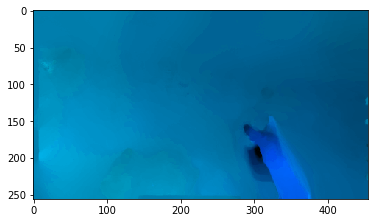

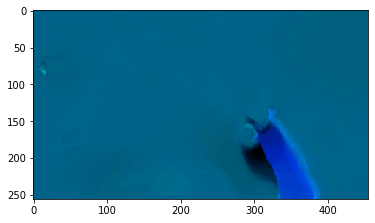

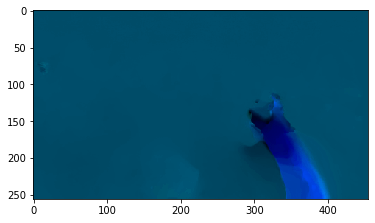

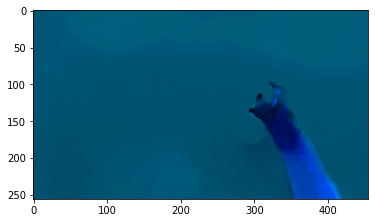

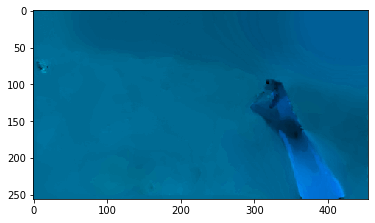

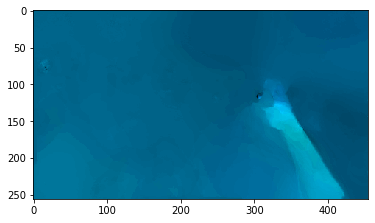

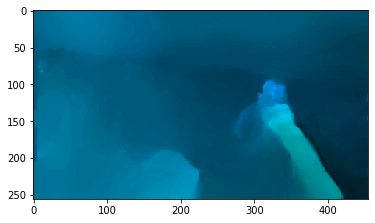

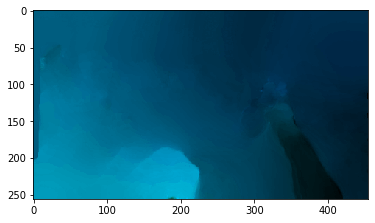

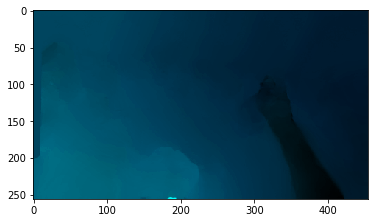

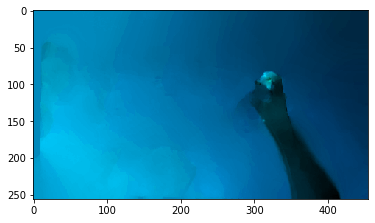

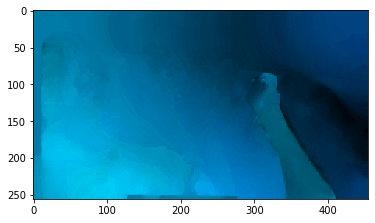

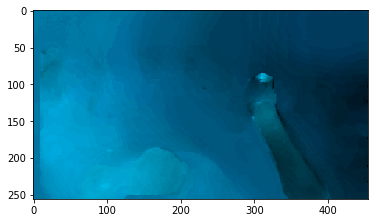

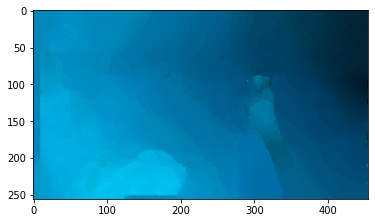

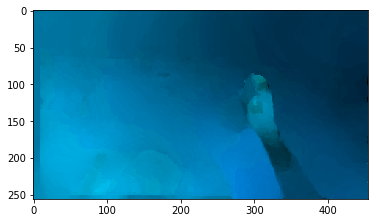

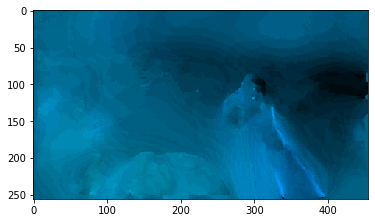

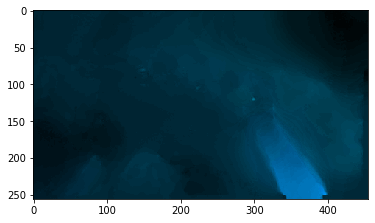

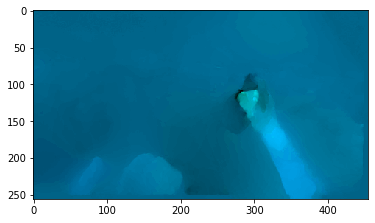

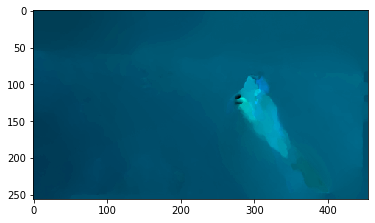

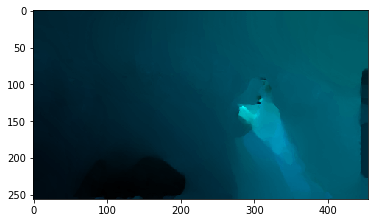

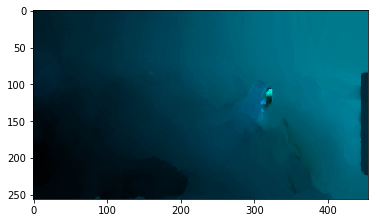

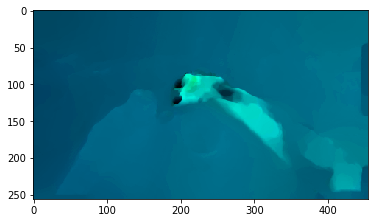

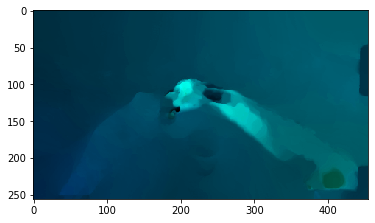

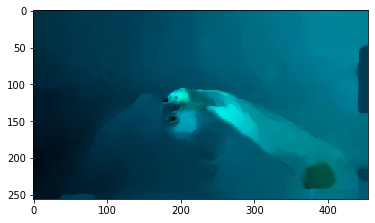

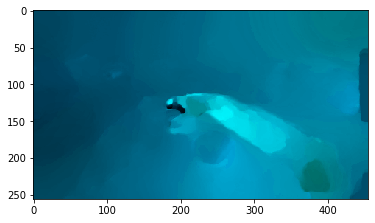

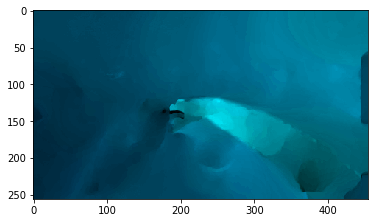

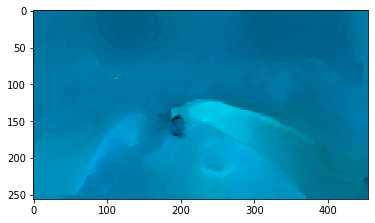

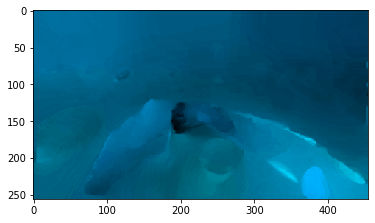

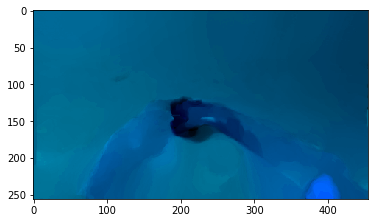

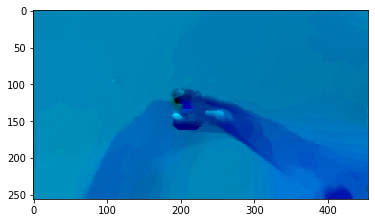

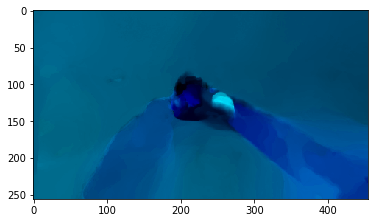

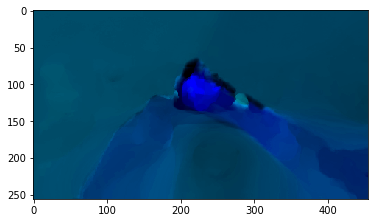

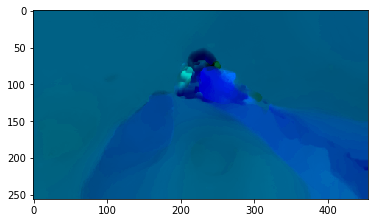

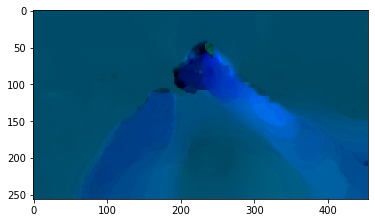

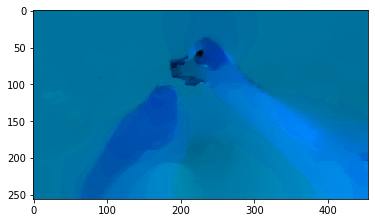

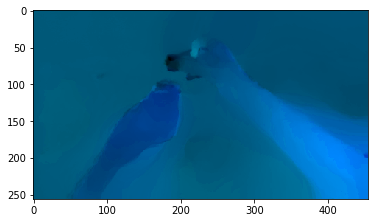

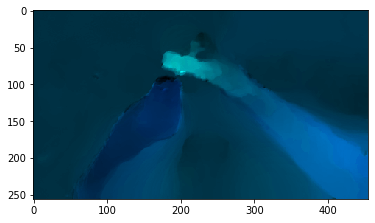

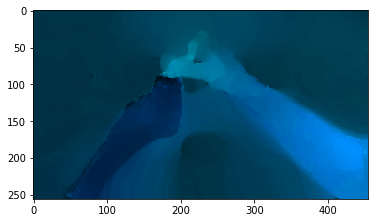

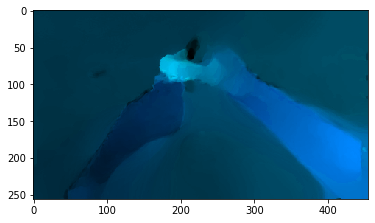

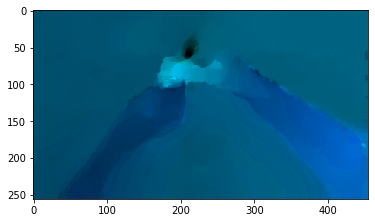

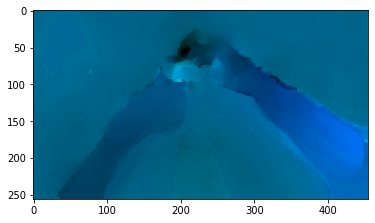

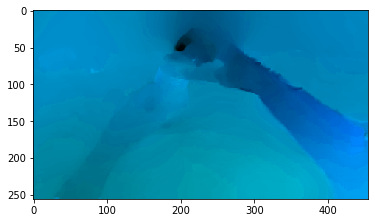

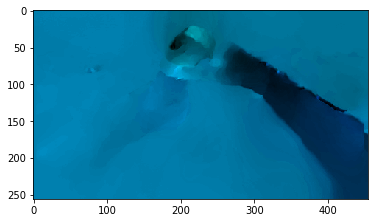

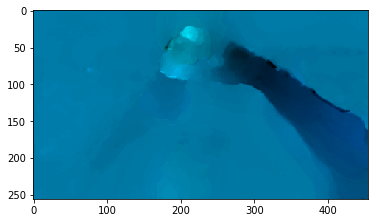

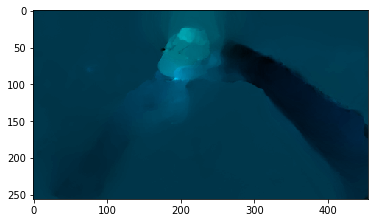

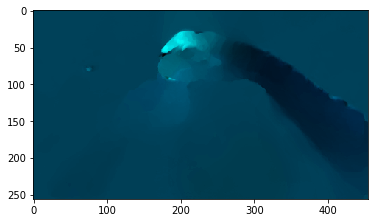

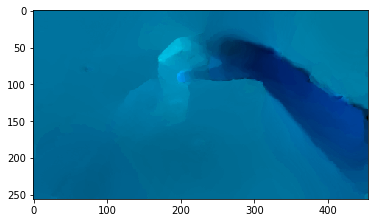

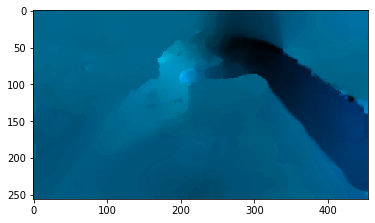

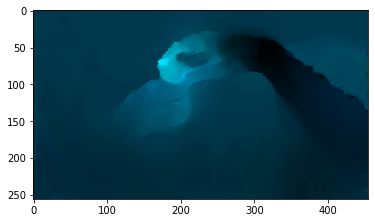

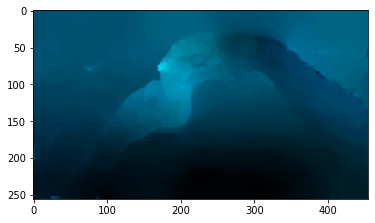

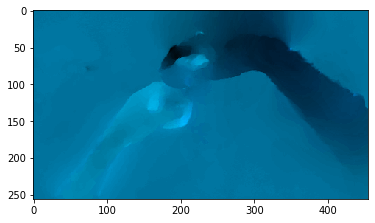

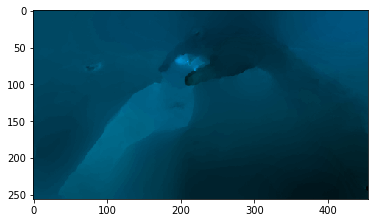

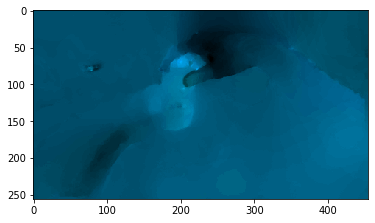

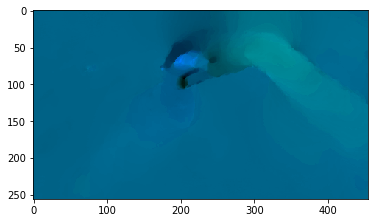

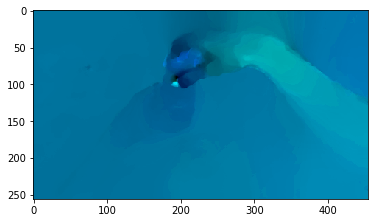

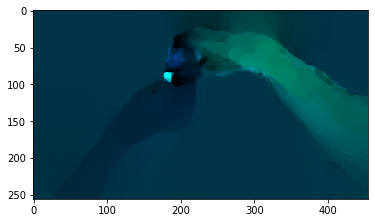

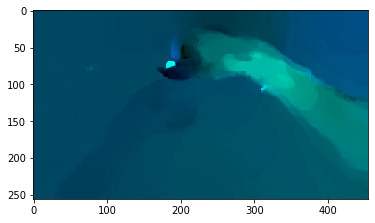

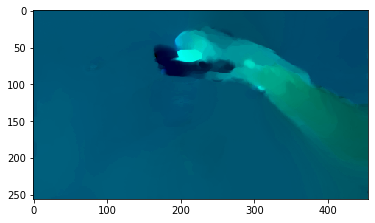

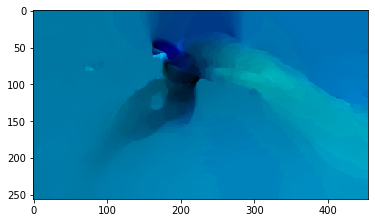

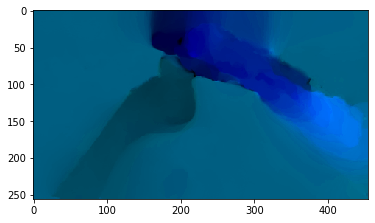

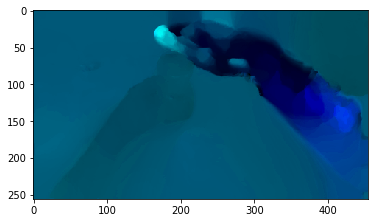

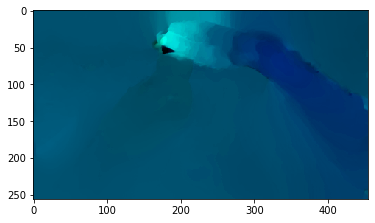

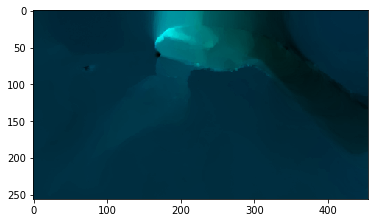

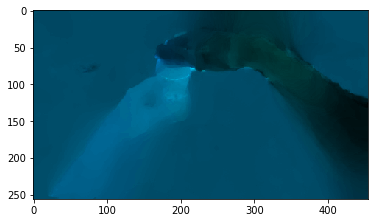

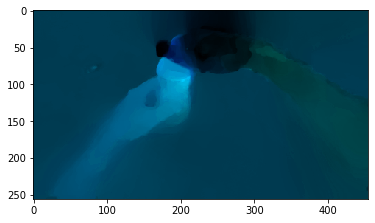

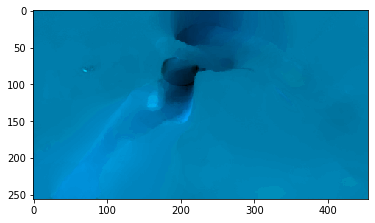

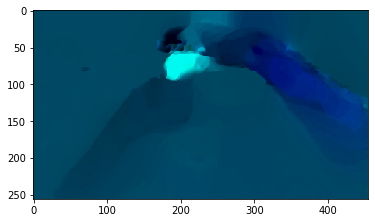

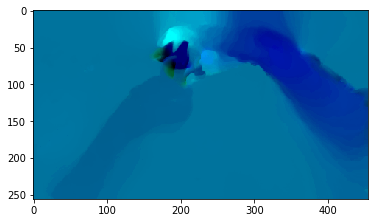

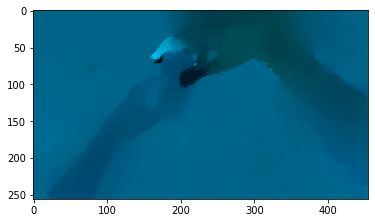

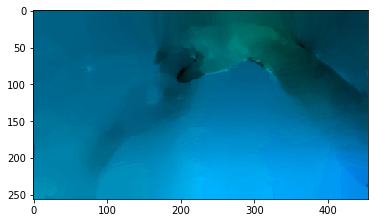

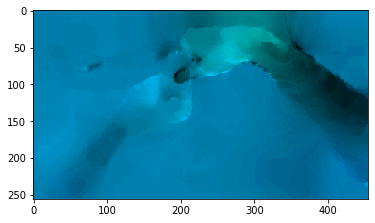

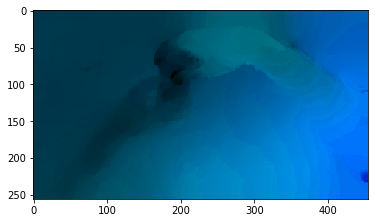

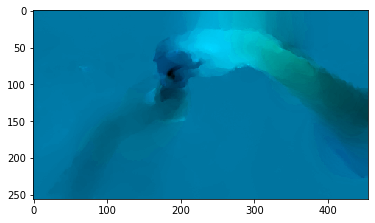

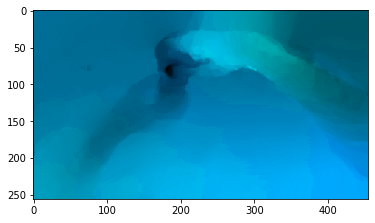

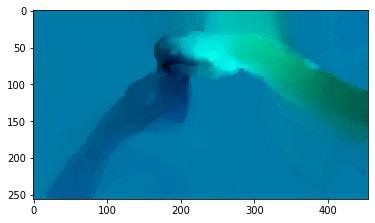

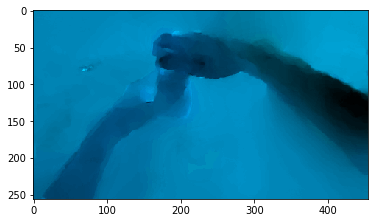

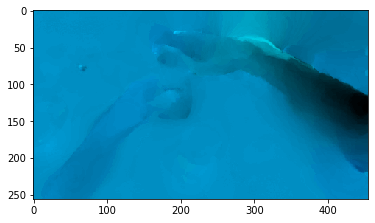

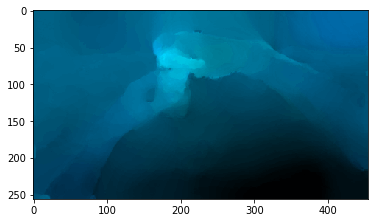

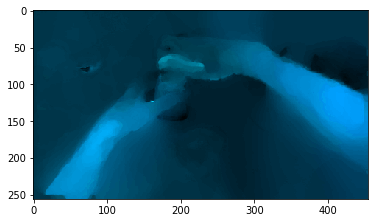

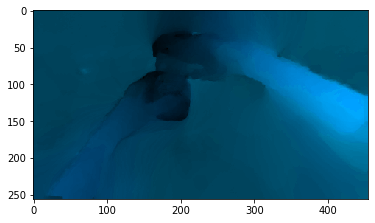

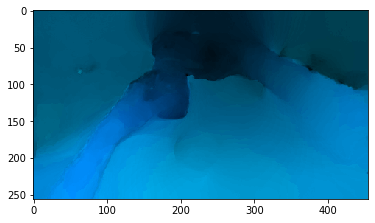

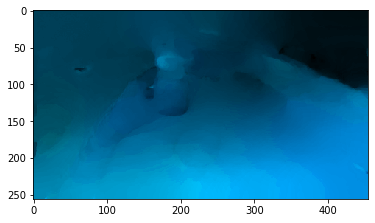

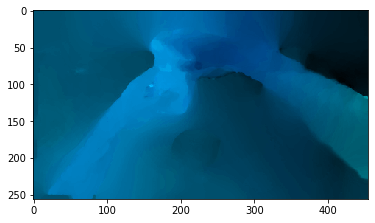

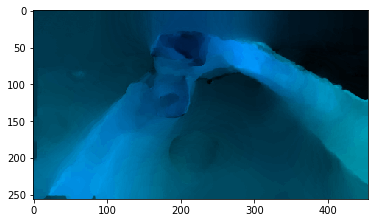

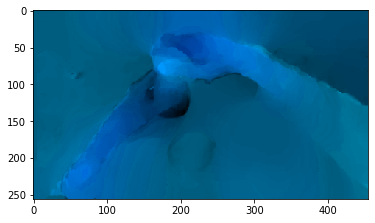

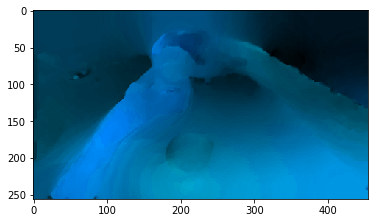

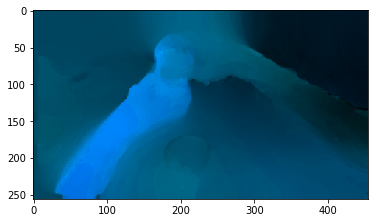

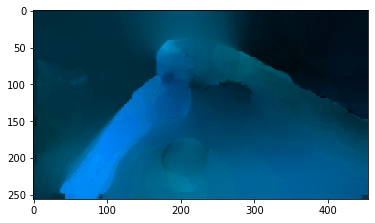

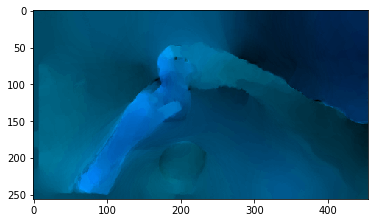

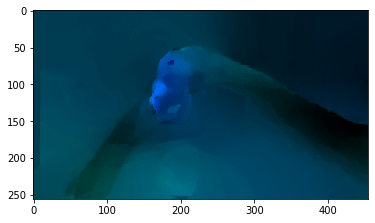

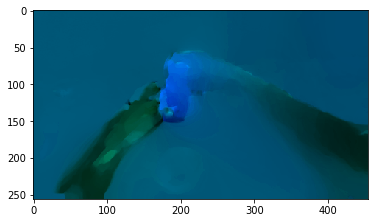

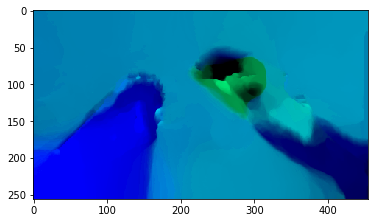

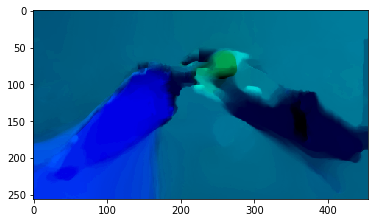

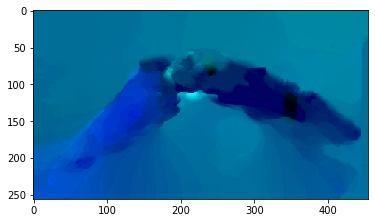

<Figure size 432x288 with 0 Axes>

In [77]:
import os
os.chdir('/home/xx1/workspaces/python/Machine Learning/')
root_dir = os.path.join('./GTEA61', 'flow_x_processed')
for dir_user in sorted(os.listdir(root_dir)):
    dir_target = os.path.join(root_dir, dir_user)
    for target in sorted(os.listdir(dir_target)):
        dir1 = os.path.join(dir_target, target)
        insts = sorted(os.listdir(dir1))
        if insts != []:
            for inst in insts:
                inst_dir = os.path.join(dir1, inst)
                #print(inst_dir)
                #save_dir = f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}/flow_surfaceNormals'
                #if not os.path.exists(save_dir):
                    #os.chdir(f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}')
                    #os.makedirs('flow_surfaceNormals')
                    #os.chdir('/home/xx1/workspaces/python/Machine Learning/')
                #print(inst_dir)
                for frame in sorted(os.listdir(inst_dir)):
                    frame_path = os.path.join(inst_dir,frame)
                    flow_x = cv2.imread(frame_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
                    flow_y = cv2.imread(frame_path.replace('flow_x','flow_y'),cv2.IMREAD_GRAYSCALE).astype(np.float32)
                    #flow_y = cv2.bitwise_not(flow_y)
                    mag, ang = cv2.cartToPolar(flow_x, flow_y)
                    hsv[...,0] = ang*180/np.pi/2
                    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

                    plt.figure()
                    plt.imshow(rgb) 
                    #print(frame_path)
                    #sn = surfaceNormal(frame_path)
                    #image_name = 'flow_surfaceNormal_'+frame[-8:]
                    #os.chdir(save_dir)
                    #cv2.imwrite(image_name,sn)
                    #os.chdir('/home/xx1/workspaces/python/Machine Learning')

<ipython-input-125-41c193fa8d5b>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


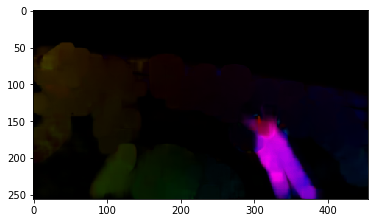

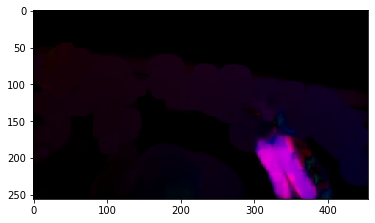

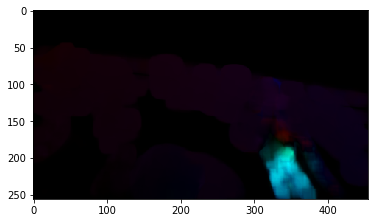

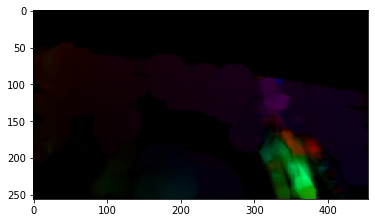

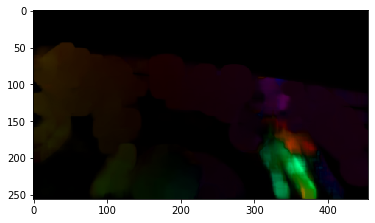

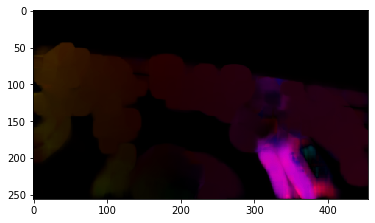

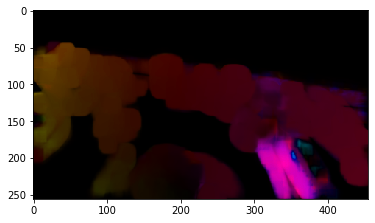

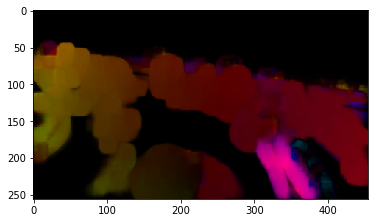

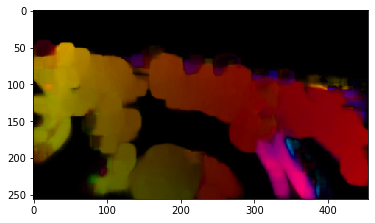

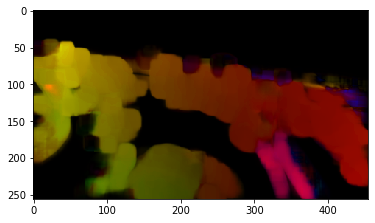

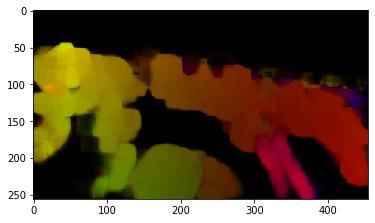

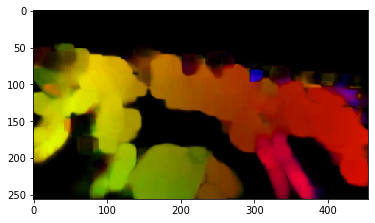

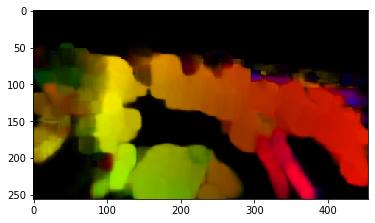

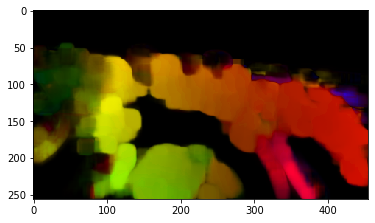

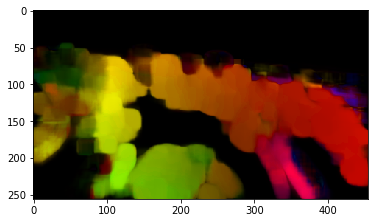

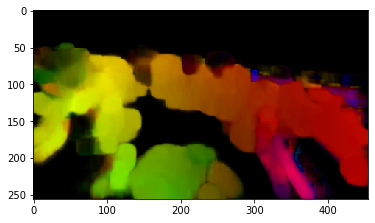

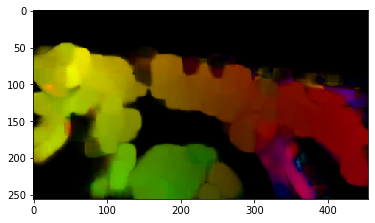

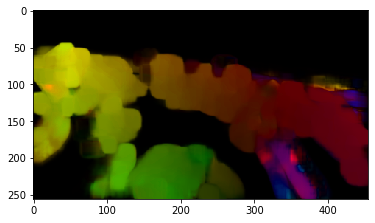

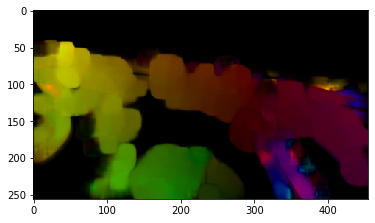

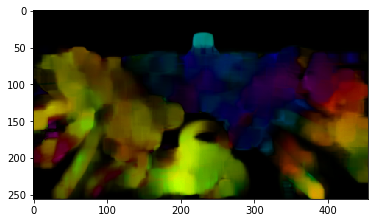

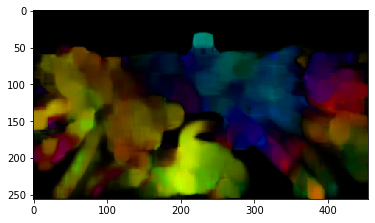

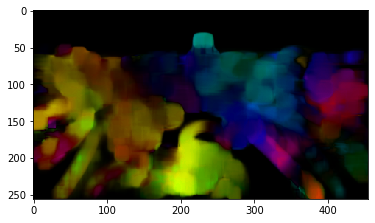

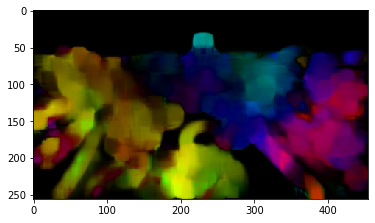

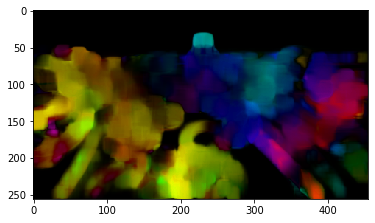

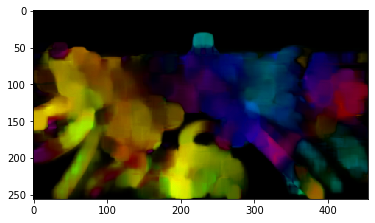

Error in callback <function flush_figures at 0x7f64b7703dc0> (for post_execute):


KeyboardInterrupt: 

In [125]:
import os
os.chdir('/home/xx1/workspaces/python/Machine Learning/')
root_dir = os.path.join('./GTEA61', 'processed_frames2')
for dir_user in sorted(os.listdir(root_dir)):
    if dir_user.startswith('.'):
        continue
    dir_target = os.path.join(root_dir, dir_user)
    for target in sorted(os.listdir(dir_target)):
        if target.startswith('.'):
            continue
        dir1 = os.path.join(dir_target, target)
        insts = sorted(os.listdir(dir1))
        if insts != []:
            for inst in insts:
                if inst.startswith('.'):
                    continue
                inst_dir = os.path.join(dir1, inst)
                #print(inst_dir)
                save_dir = f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}/opticalFlowHSV'
                if not os.path.exists(save_dir):
                    os.chdir(f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}')
                    os.makedirs('opticalFlowHSV')
                    os.chdir('/home/xx1/workspaces/python/Machine Learning/')
                #print(inst_dir)
                #fs = sorted(os.listdir(inst_dir))
                prvs = f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}/rgb/rgb0001.png'
                prvs = cv2.imread(prvs)
                prvs = cv2.cvtColor(prvs,cv2.COLOR_BGR2GRAY)
                for image_index in range(2,1+len(os.listdir(f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/{dir_user}/{target}/{inst}/rgb'))):
                #for ind,frame in enumerate(fs):
                    frame_path = os.path.join(inst_dir,frame)
                    frame2 = cv2.imread(f'./GTEA61/processed_frames2/S1/close_chocolate/1/rgb/rgb{str(int(np.floor(image_index))).zfill(4)}.png')
                    next_frame = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

                    flow = cv2.calcOpticalFlowFarneback(prvs,next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
                    hsv[...,0] = ang*180/np.pi/2
                    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    

                    plt.figure()
                    plt.imshow(rgb) 


In [64]:
root_dir = os.path.join(root_dir, 'flow_x_processed')
    print(dataset)
    for dir_user in sorted(os.listdir(root_dir)):
        if dir_user not in dataset:
            continue
        class_id = 0
        dir = os.path.join(root_dir, dir_user)
        for target in sorted(os.listdir(dir)):
            dir1 = os.path.join(dir, target)
            insts = sorted(os.listdir(dir1))
            if insts != []:
                for inst in insts:
                    inst_dir = os.path.join(dir1, inst)
                    numFrames = len(glob.glob1(inst_dir, fmt))
                    if numFrames >= stackSize:
                        DatasetX.append(inst_dir)
                        DatasetY.append(inst_dir.replace('flow_x', 'flow_y'))
                        Labels.append(class_id)
                        NumFrames.append(numFrames)
            class_id += 1

IndentationError: unexpected indent (<ipython-input-64-28ed1ea66fd9>, line 2)

In [3]:
import numpy as np
import os
import sys
import tensorflow as tf
from PIL import Image
import cv2
import matplotlib.colors as cl
import matplotlib.pyplot as plt
# WARNING: this will work on little-endian architectures (eg Intel x86) only!

#warp using scipy
def warp_image(im, flow):
    """
    Use optical flow to warp image to the next
    :param im: image to warp
    :param flow: optical flow
    :return: warped image
    """
    from scipy import interpolate
    image_height = im.shape[0]
    image_width = im.shape[1]
    flow_height = flow.shape[0]
    flow_width = flow.shape[1]
    n = image_height * image_width
    (iy, ix) = np.mgrid[0:image_height, 0:image_width]
    (fy, fx) = np.mgrid[0:flow_height, 0:flow_width]
    fx = fx.astype(np.float64)
    fy = fy.astype(np.float64)
    fx += flow[:,:,0]
    fy += flow[:,:,1]
    mask = np.logical_or(fx <0 , fx > flow_width)
    mask = np.logical_or(mask, fy < 0)
    mask = np.logical_or(mask, fy > flow_height)
    fx = np.minimum(np.maximum(fx, 0), flow_width)
    fy = np.minimum(np.maximum(fy, 0), flow_height)
    points = np.concatenate((ix.reshape(n,1), iy.reshape(n,1)), axis=1)
    xi = np.concatenate((fx.reshape(n, 1), fy.reshape(n,1)), axis=1)
    warp = np.zeros((image_height, image_width, im.shape[2]))
    for i in range(im.shape[2]):
        channel = im[:, :, i]
        values = channel.reshape(n, 1)
        new_channel = interpolate.griddata(points, values, xi, method='cubic')
        new_channel = np.reshape(new_channel, [flow_height, flow_width])
        new_channel[mask] = 1
        warp[:, :, i] = new_channel.astype(np.uint8)

    return warp.astype(np.uint8)


def get_flow(filename):
    with open(filename, 'rb') as f:
        magic = np.fromfile(f, np.float32, count=1)
        if 202021.25 != magic:
            #print 'Magic number incorrect. Invalid .flo file'
        else:
            w = np.fromfile(f, np.int32, count=1)
            h = np.fromfile(f, np.int32, count=1)
            #print 'Reading %d x %d flo file' % (w, h)
            data = np.fromfile(f, np.float32, count=2*w*h)
            # Reshape data into 3D array (columns, rows, bands)
            data2D = np.resize(data, (1, h[0], w[0],2))
            data2D = np.transpose(data2D,[0, 3,1,2])
            return data2D

def get_pixel_value(img, x, y):
    """
    Utility function to get pixel value for coordinate
    vectors x and y from a  4D tensor image.
    Input
    -----
    - img: tensor of shape (B, H, W, C)
    - x: flattened tensor of shape (B*H*W, )
    - y: flattened tensor of shape (B*H*W, )
    Returns
    -------
    - output: tensor of shape (B, H, W, C)
    """
    shape = tf.shape(x)
    batch_size = shape[0]
    height = shape[1]
    width = shape[2]

    batch_idx = tf.range(0, batch_size)
    batch_idx = tf.reshape(batch_idx, (batch_size, 1, 1))
    b = tf.tile(batch_idx, (1, height, width))

    indices = tf.stack([b, y, x], 3)

    return tf.gather_nd(img, indices)

def tf_warp(img, flow, H, W):
#    H = 256
#    W = 256
    x,y = tf.meshgrid(tf.range(W), tf.range(H))
    x = tf.expand_dims(x,0)
    x = tf.expand_dims(x,0)

    y  =tf.expand_dims(y,0)
    y = tf.expand_dims(y,0)

    x = tf.cast(x, tf.float32)
    y = tf.cast(y, tf.float32)
    grid  = tf.concat([x,y],axis = 1)
#    print grid.shape
    flows = grid+flow
    #print flows.shape
    max_y = tf.cast(H - 1, tf.int32)
    max_x = tf.cast(W - 1, tf.int32)
    zero = tf.zeros([], dtype=tf.int32)

    x = flows[:,0,:,:]
    y = flows[:,1,:,:]
    x0 = x
    y0 = y
    x0 = tf.cast(x0, tf.int32)
    x1 = x0 + 1
    y0 = tf.cast(y0,  tf.int32)
    y1 = y0 + 1

    # clip to range [0, H/W] to not violate img boundaries
    x0 = tf.clip_by_value(x0, zero, max_x)
    x1 = tf.clip_by_value(x1, zero, max_x)
    y0 = tf.clip_by_value(y0, zero, max_y)
    y1 = tf.clip_by_value(y1, zero, max_y)

    # get pixel value at corner coords
    Ia = get_pixel_value(img, x0, y0)
    Ib = get_pixel_value(img, x0, y1)
    Ic = get_pixel_value(img, x1, y0)
    Id = get_pixel_value(img, x1, y1)

    # recast as float for delta calculation
    x0 = tf.cast(x0, tf.float32)
    x1 = tf.cast(x1, tf.float32)
    y0 = tf.cast(y0, tf.float32)
    y1 = tf.cast(y1, tf.float32)


    # calculate deltas
    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    # add dimension for addition
    wa = tf.expand_dims(wa, axis=3)
    wb = tf.expand_dims(wb, axis=3)
    wc = tf.expand_dims(wc, axis=3)
    wd = tf.expand_dims(wd, axis=3)

    # compute output
    out = tf.add_n([wa*Ia, wb*Ib, wc*Ic, wd*Id])
    return out

#img = Image.open('frame_0048.png')
#img = np.reshape(np.asarray(img, dtype=np.float32),[1,436,1024,3]) 
#flow_file = 'frame_0047.flo'
#flow = get_flow(flow_file)
with tf.Session() as sess:
    a = tf.placeholder(tf.float32, shape = [None,None,None,3])
    flow_vec = tf.placeholder(tf.float32, shape = [None, 2, None, None])
    init = tf.global_variables_initializer()
    sess.run(init)

    output = tf_warp(a, flow, 436, 1024)
    out = sess.run(output, feed_dict = {a:img, flow_vec:flow})
    out = np.clip(out,0,255).astype('uint8')
#        print out.shape
    im = Image.fromarray(out[0].astype('uint8'))
    im.save('output.jpg') 


IndentationError: expected an indented block (<ipython-input-3-070e1c99c70a>, line 55)

TypeError: Image data of dtype object cannot be converted to float

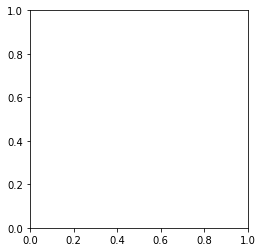

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

os.chdir('/home/xx1/workspaces/python/Machine Learning/')

path = r'./GTEA61/processed_frames2/S/close_chocolate/1/rgb/rgb0001.png'
frame1 = cv2.imread(path)
plt.figure()
plt.imshow(frame1) 
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(frame1_rgb) 

frame1_hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
plt.figure()
plt.imshow(frame1_hsv) 

prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(prvs) 
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

hsv2 = np.zeros_like(frame1)
hsv2[...,1] = 255

hsv3 = np.zeros_like(frame1)
hsv3[...,1] = 255

for image_index in range(2,1+len(os.listdir(f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/S2/close_chocolate/1/rgb')),3):
    frame2 = cv2.imread(f'./GTEA61/processed_frames2/S1/close_chocolate/1/rgb/rgb{str(int(np.floor(image_index))).zfill(4)}.png')
    #print(f'./GTEA61/processed_frames2/S1/close_chocolate/1/rgb/rgb{str(int(np.floor(image_index))).zfill(4)}.png')
    next_frame = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    kernel = np.ones((3,3),np.float32)/9
    
    #flow = cv2.calcOpticalFlowFarneback(prvs,next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    fpath = './GTEA61/flow_x_processed/S2/spread_peanut,spoon,bread/3/flow_x_00053.png'
    flow_x = cv2.imread(fpath,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    #bil_x = cv2.filter2D(flow_x,-1,kernel)
    #unsharp_image_x = cv2.addWeighted(flow_x, 2, bil_x, -1, 0)
    flow_y = cv2.imread(fpath.replace('flow_x','flow_y'),cv2.IMREAD_GRAYSCALE).astype(np.float32)
    #bil_y = cv2.filter2D(flow_y,-1,kernel)
    #unsharp_image_y = cv2.addWeighted(flow_y, 2, bil_y, -1, 0)
    
    #mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    #hsv[...,0] = ang*180/np.pi/2
    #hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    #rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    #plt.figure()
    #plt.imshow(rgb) 
    #plt.title('dense flow HSV')
    #plt.show()
    
    hsv2 = np.zeros((flow_x.shape[0],flow_x.shape[1],3)).astype(np.uint8)
    hsv2[...,1] = 255
    
    #flow_y = cv2.bitwise_not(flow_y)
    mag2, ang2 = cv2.cartToPolar(flow_x, flow_y)
    hsv2[...,0] = ang2*180/np.pi/2
    hsv2[...,2] = cv2.normalize(mag2,None,0,255,cv2.NORM_MINMAX)
    rgb2 = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
    bil = cv2.filter2D(rgb2,-1,kernel)
    unsharp_image_x = cv2.addWeighted(bil, 2, rgb2, -1, 0)
    plt.imshow(rgb2)
    plt.title('warped flow HSV')
    plt.show()
    
    #flow_composed_x = np.array((flow[...,0] + flow_x)/2) 
    #flow_composed_x = np.minumum(flow[...,0],flow_x)
    #flow_composed_x[flow_composed_x > 0] = 1
    #flow_composed_y = np.multiply(flow[...,1],flow_y)
    #flow_composed_y[flow_composed_y > 0] = 1
    #flow_composed_xy = flow_composed_x + flow_composed_y
    #flow_composed_xy = np.array(flow[...,0]+flow[...,1])
    #flow_composed_xy[flow_composed_xy > 0] = 1
    #fcxy = np.repeat(flow_composed_xy[:, :, np.newaxis], 3, axis=2)
    #flow_composed_x[flow_x == 0] = 0
    #flow_composed_x[flow[...,0] == 0] = 0
    #flow_composed_y = np.array((flow[...,1] + flow_y)/2)
    #flow_composed_y[flow_y == 0] = 0
    #flow_composed_y[flow[...,1] == 0] = 0
    #mult1 = np.multiply(rgb,fcxy)
    #rgb[rgb > 30] = 1
    #rgb[rgb < 30] = 0
    #mult2 = np.multiply(rgb2,fcxy)
    #mm = np.maximum(mult1,mult2)
    #plt.imshow(mult2)
    #plt.title('ilbordello')
    #plt.show()
    
    #im_media = np.array((rgb2 + rgb)/2,dtype = int)
    #plt.imshow(im_media)
    #plt.title('media')
    #plt.show()


    #im_sum = (rgb2 + rgb)
    #plt.imshow(im_sum)
    #plt.title('somma')
    #plt.show()

    #im_max = np.maximum(rgb,rgb2)
    #plt.imshow(im_max)
    #plt.title('max')
    #plt.show()

    #im_min = np.minimum(rgb,rgb2)
    #plt.imshow(im_min)
    #plt.title('min')
    #plt.show()

    
    #k = cv2.waitKey(30) & 0xff
    #if k == 27:
    #    break
    #elif k == ord('s'):
    #    cv2.imwrite('opticalfb.png',frame2)
    #    cv2.imwrite('opticalhsv.png',rgb)
    prvs = next_frame


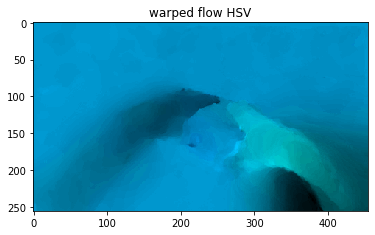

In [12]:
#print(f'./GTEA61/processed_frames2/S1/close_chocolate/1/rgb/rgb{str(int(np.floor(image_index))).zfill(4)}.png')
#next_frame = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

#kernel = np.ones((3,3),np.float32)/9

#flow = cv2.calcOpticalFlowFarneback(prvs,next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
fpath = './GTEA61/flow_x_processed/S1/fold_bread/1/flow_x_00038.png'
flow_x = cv2.imread(fpath,cv2.IMREAD_GRAYSCALE).astype(np.float32)
#bil_x = cv2.filter2D(flow_x,-1,kernel)
#unsharp_image_x = cv2.addWeighted(flow_x, 2, bil_x, -1, 0)
flow_y = cv2.imread(fpath.replace('flow_x','flow_y'),cv2.IMREAD_GRAYSCALE).astype(np.float32)
#bil_y = cv2.filter2D(flow_y,-1,kernel)
#unsharp_image_y = cv2.addWeighted(flow_y, 2, bil_y, -1, 0)

#mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
#hsv[...,0] = ang*180/np.pi/2
#hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
#rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

#plt.figure()
#plt.imshow(rgb) 
#plt.title('dense flow HSV')
#plt.show()

hsv2 = np.zeros((flow_x.shape[0],flow_x.shape[1],3)).astype(np.uint8)
hsv2[...,1] = 255

#flow_y = cv2.bitwise_not(flow_y)
mag2, ang2 = cv2.cartToPolar(flow_x, flow_y)
hsv2[...,0] = ang2*180/np.pi/2
hsv2[...,2] = cv2.normalize(mag2,None,0,255,cv2.NORM_MINMAX)
rgb2 = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
#bil = cv2.filter2D(rgb2,-1,kernel)
#unsharp_image_x = cv2.addWeighted(bil, 2, rgb2, -1, 0)
plt.imshow(rgb2)
plt.title('warped flow HSV')
plt.show()


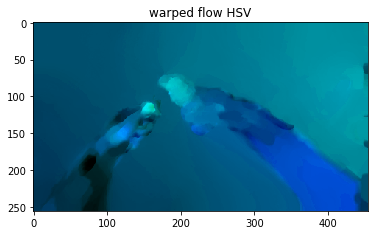

True

In [16]:
fpath = './GTEA61/flow_x_processed/S1/open_honey/1/flow_x_00025.png'
flow_x = cv2.imread(fpath,cv2.IMREAD_GRAYSCALE).astype(np.float32)
flow_y = cv2.imread(fpath.replace('flow_x','flow_y'),cv2.IMREAD_GRAYSCALE).astype(np.float32)
hsv2 = np.zeros((flow_x.shape[0],flow_x.shape[1],3)).astype(np.uint8)
hsv2[...,1] = 255
mag2, ang2 = cv2.cartToPolar(flow_x, flow_y)
hsv2[...,0] = ang2*180/np.pi/2
hsv2[...,2] = cv2.normalize(mag2,None,0,255,cv2.NORM_MINMAX)
rgb2 = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
plt.imshow(rgb2)
plt.title('warped flow HSV')
plt.show()
cv2.imwrite('open_honey.png',rgb2)

In [45]:
cv2.destroyAllWindows()

In [128]:
print(frame1.shape)
print(flow_x.shape)
print([flow_x.shape,3])

(256, 455, 3)
(256, 455)
[(256, 455), 3]


In [130]:
np.zeros((flow_x.shape[0],flow_x.shape[1],3)).shape

(256, 455, 3)

In [4]:
import os
action = 'scoop_peanut,spoon'
frame = 24
prvs = f'/home/xx1/workspaces/python/Machine Learning/GTEA61/processed_frames2/S1/{action}/1/rgb/rgb{str(int(np.floor(frame))).zfill(4)}.png'
prvs = cv2.imread(prvs)
prvs = cv2.cvtColor(prvs,cv2.COLOR_BGR2GRAY)
frame2 = cv2.imread(f'./GTEA61/processed_frames2/S1/{action}/1/rgb/rgb{str(int(np.floor(frame+1))).zfill(4)}.png')
next_frame = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
cv2.imwrite(f'{action}_optical_flow_x.png',flow[...,0]*255)
cv2.imwrite(f'{action}_optical_flow_y.png',flow[...,1]*255)


True

In [ ]:
cv2.waitKet(0)